Data Mining Prediction SVM Firdaus

Nama : Firdaus

NIM : 221011402153




belajar *collab*

pertemuan 1

In [ ]:
print ("wellcome")

wellcome


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 12.3MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('diabetes-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings,warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head(2))
display(df.tail(2))
display(df.sample(4))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
208,1,96,64,27,87,33.2,0.289,21,0
347,3,116,0,0,0,23.5,0.187,23,0
672,10,68,106,23,49,35.5,0.285,47,0
720,4,83,86,19,0,29.3,0.317,34,0


Pert 4

3.1 The Shape of the Dataset [ Bentuk dari suatu Ukuran Data ]

In [ ]:
df.shape

(768, 9)

3.2 List Types of all columns [ Daftar Jenis semua kolom ]

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3.3 Info of Dataset [ Info Kumpulan Data ]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.4 Summary of the dataset [ Ringkasan Dataset ]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


check null value
  4. Data Cleaning




# **4.1 Drop the Duplicate**

In [ ]:
# check the shape before drop duplicate
df.shape

(768, 9)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(768, 9)

#4.2 Check the NULL Value

In [ ]:
# check of null values,
# check the missing value in any column,
# display number of null value in every coulmn in dataset.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# check the no.of zero value in dataset

In [ ]:
print ('No of zero value in Glucose', df[df['Glucose']==0].shape[0])

No of zero value in Glucose 5


In [ ]:
print ('No of zero value in BloodPressure', df[df['BloodPressure']==0].shape[0])

No of zero value in BloodPressure 35


In [ ]:
print ('No of zero value in SkinThickness', df[df['SkinThickness']==0].shape[0])

No of zero value in SkinThickness 227


In [ ]:
print ('No of zero value in Insulin', df[df['Insulin']==0].shape[0])

No of zero value in Insulin 374


In [ ]:
df['glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('no of zero value in Glucose', df[df['Glucose']==0].shape[0])

no of zero value in Glucose 5


In [ ]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,121.681605
std,3.369578,31.972618,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,30.436016
min,0.000000,0.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,44.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,99.750000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,117.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,199.000000


Negative (0): 500
Positive (1): 268


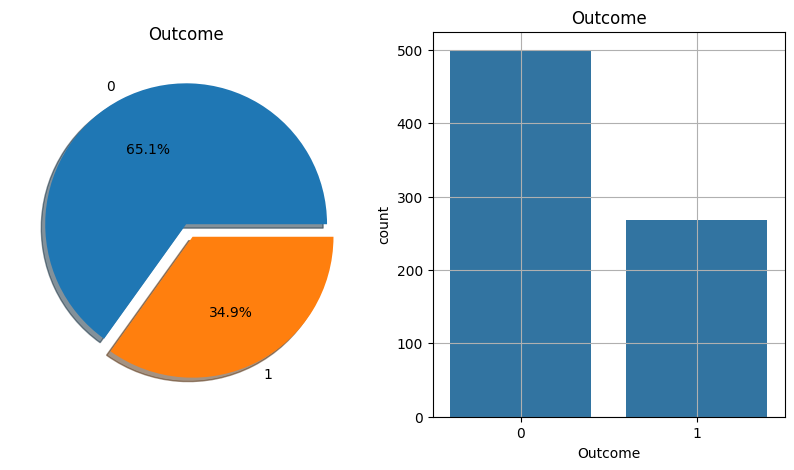

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Outcome count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

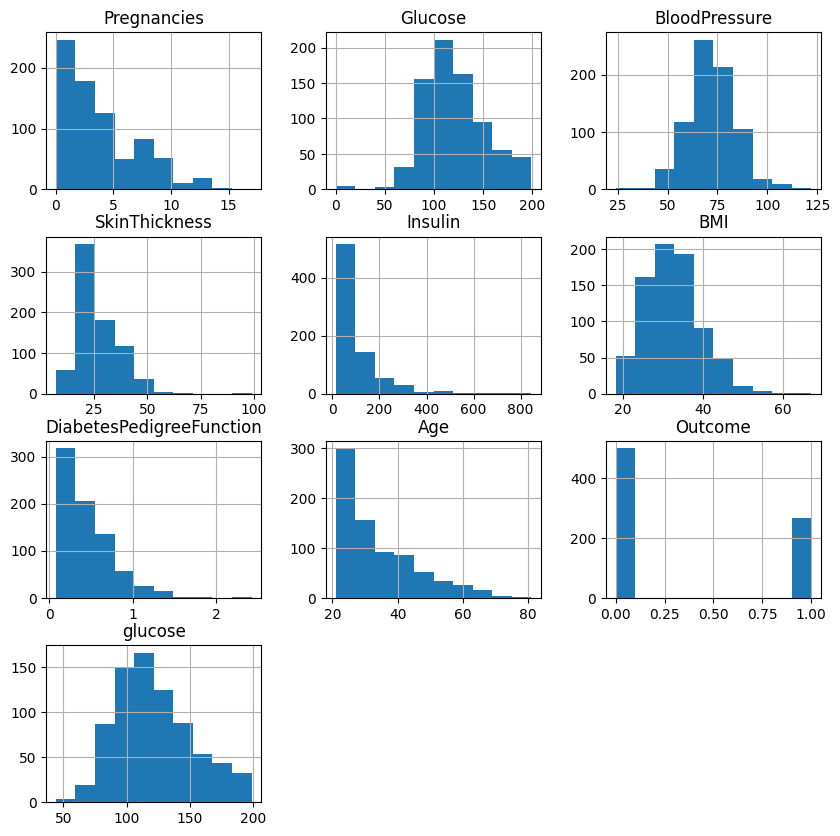

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>,
        <Axes: xlabel='glucose', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel

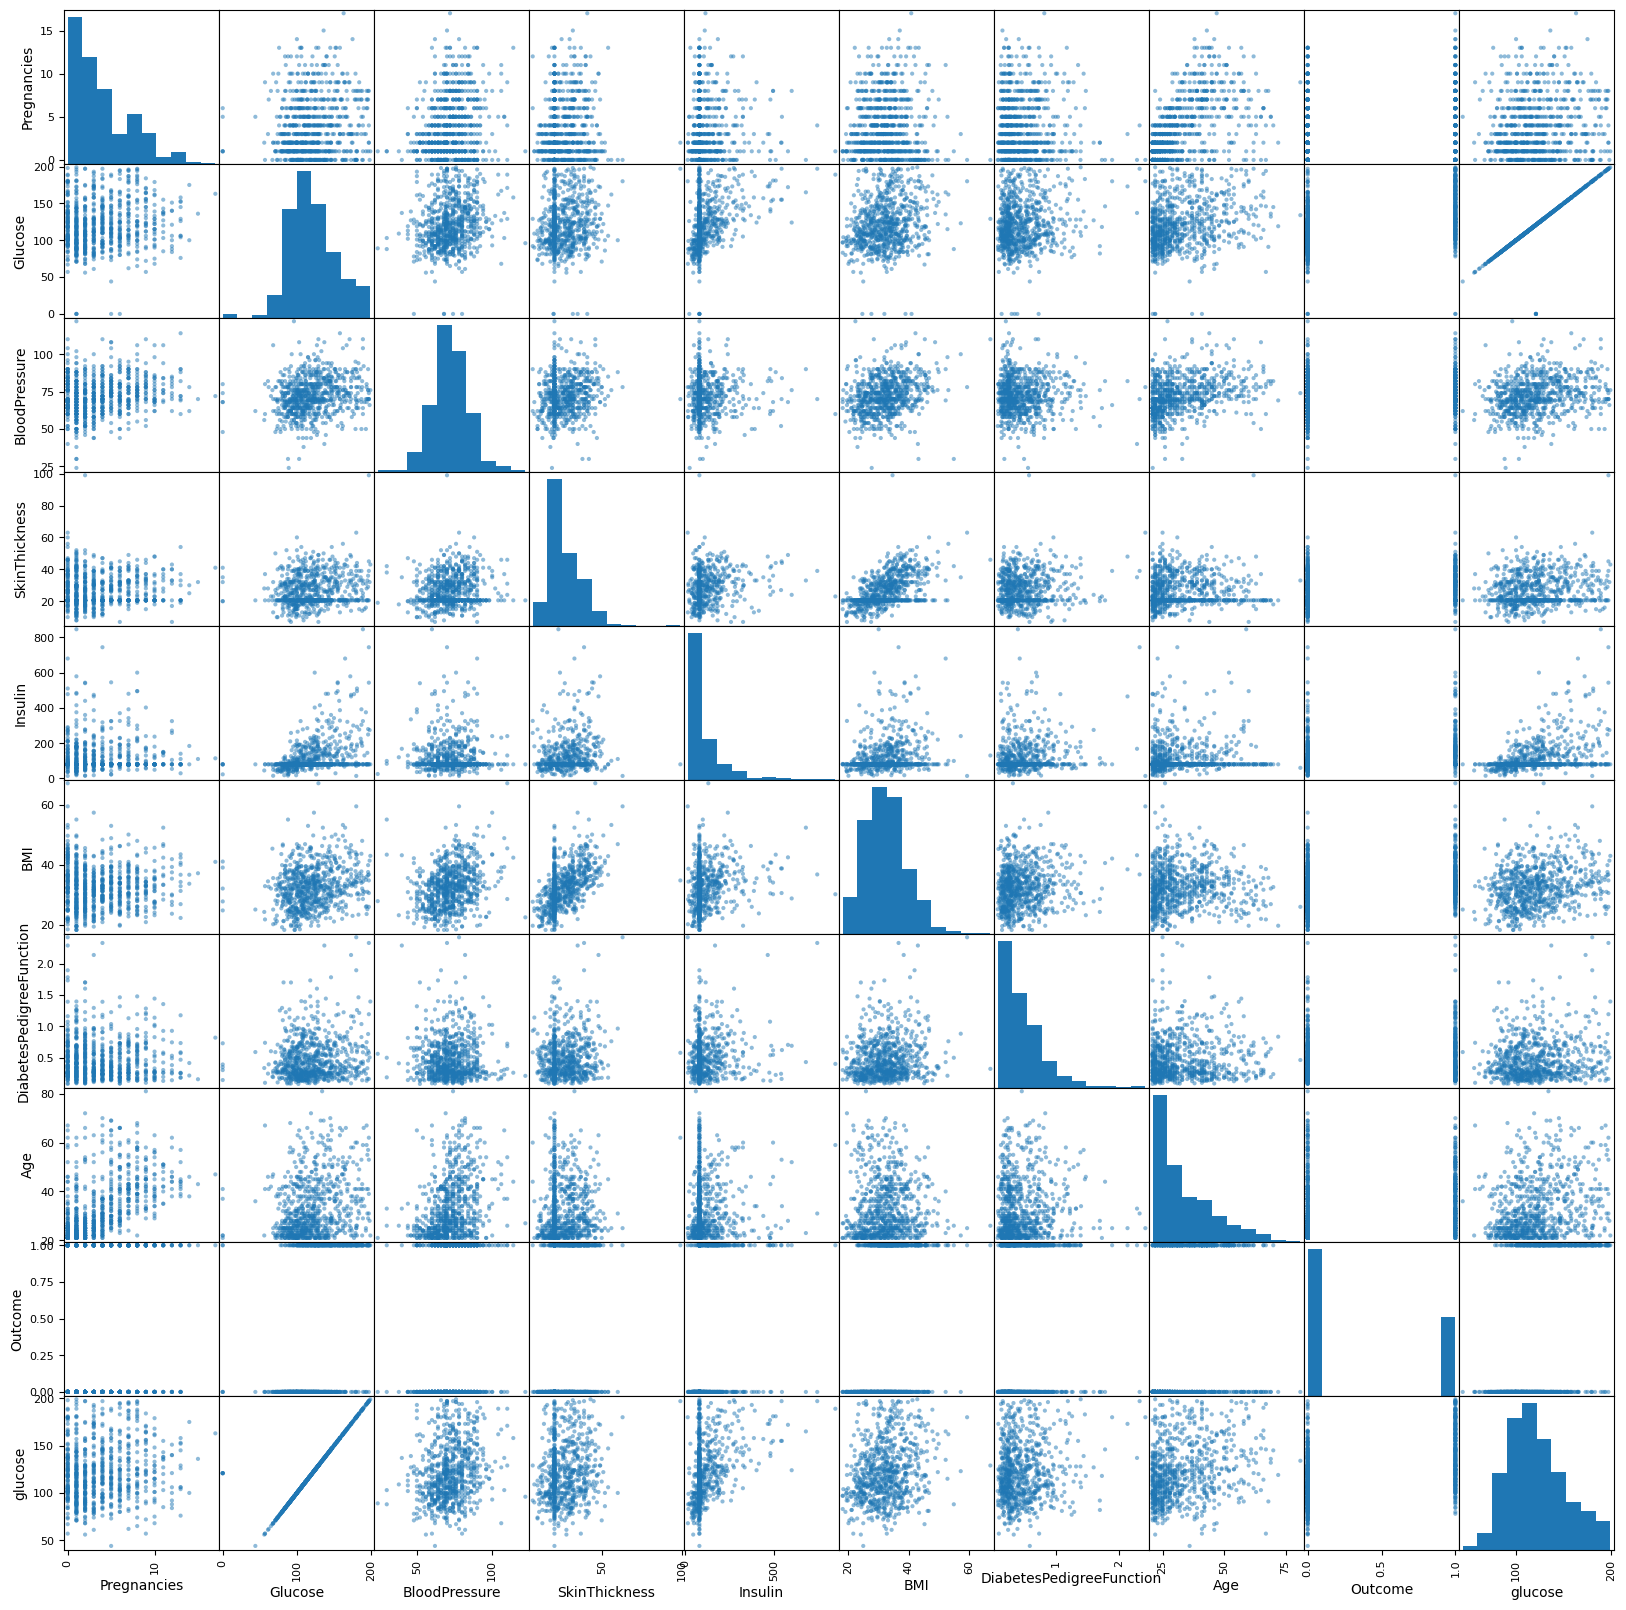

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20))

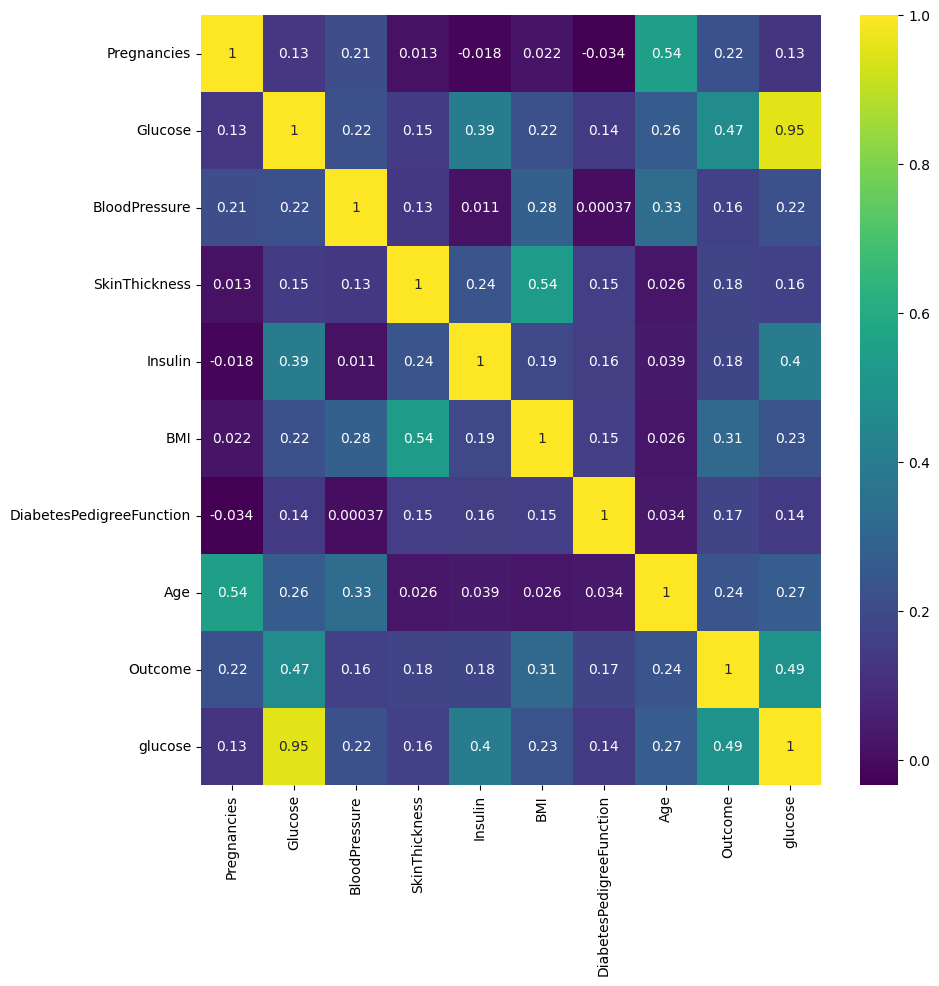

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

In [ ]:
target_name = 'Outcome'
y = df[target_name]
x = df.drop(target_name, axis=1)

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucose
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,148.0
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,85.0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,183.0
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,89.0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,137.0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [ ]:
x_train.shape, y_train.shape

((614, 9), (614,))

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [ ]:
sv_pred=sv.predict(x_test)

In [ ]:
sv_pred.shape

(154,)

# 10) Model Evaluation.

10.1) Train Score and Test Score

In [ ]:
#train score & test score SVM
from sklearn.metrics import accuracy_score
print("Traint Accuracy of SVM", sv.score(x_train, y_train)*100)
print("Accuracy (test) score of SVM", sv.score(x_test, y_test)*100)
print("Accuracy (test) score of SVM", accuracy_score(y_test, sv_pred)*100)


Traint Accuracy of SVM 81.75895765472313
Accuracy (test) score of SVM 83.11688311688312
Accuracy (test) score of SVM 83.11688311688312


Confusion Matriks of "SVM"


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
#confusion matrix od logistic regression

cm=confusion_matrix(y_test,sv_pred)
cm

array([[93,  4],
       [22, 35]])

<Axes: >

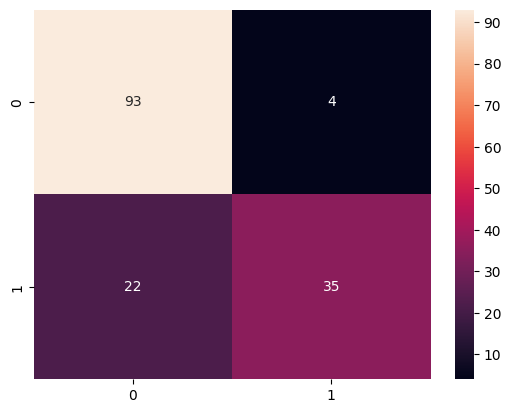

In [ ]:
sns.heatmap(confusion_matrix(y_test, sv_pred),annot=True,fmt='d')

In [ ]:
print ('Classification Report of SVM: \n',classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM: 
               precision    recall  f1-score   support

           0     0.8087    0.9588    0.8774        97
           1     0.8974    0.6140    0.7292        57

    accuracy                         0.8312       154
   macro avg     0.8531    0.7864    0.8033       154
weighted avg     0.8415    0.8312    0.8225       154



In [ ]:
TN = cm[0,0]
FP = cm[1,0]
FN = cm[1,0]
TP = cm[1,1]

In [ ]:
TN, FP, FN, TP

(93, 22, 22, 35)

In [ ]:
# Making the confusion Matrix of SVM
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, sv_pred)
cm

array([[93,  4],
       [22, 35]])

In [ ]:
# Making the confusion Matrix of SVM
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, sv_pred)

In [ ]:
print('TN - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate of SVM:{}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('Misclassification Rate of SVM :{}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - True Negative 93
FP - False Positive 4
FN - False Negative 22
TP - True Positive 35
Accuracy Rate of SVM:83.11688311688312
Misclassification Rate of SVM :16.883116883116884


<Axes: >

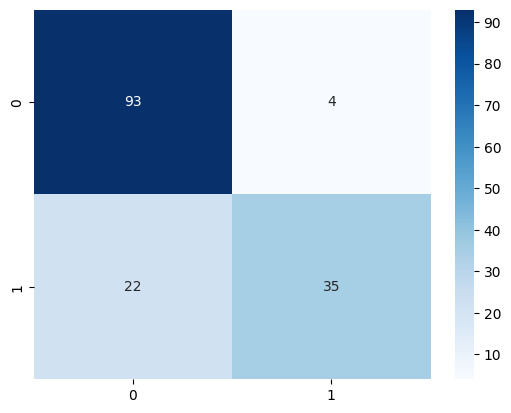

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, sv_pred),cmap='Blues',annot=True, fmt="d"
    )

Classification Report of SVM

In [ ]:
print('Classification Report of SVM:\n', classification_report(y_test,sv_pred,digits=4))

Classification Report of SVM:
               precision    recall  f1-score   support

           0     0.8087    0.9588    0.8774        97
           1     0.8974    0.6140    0.7292        57

    accuracy                         0.8312       154
   macro avg     0.8531    0.7864    0.8033       154
weighted avg     0.8415    0.8312    0.8225       154



In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [ ]:
TP, FP

(35, 4)

In [ ]:
Precision = TP/(TP+FP)
Precision

0.8974358974358975

In [ ]:
from sklearn.metrics import precision_score
print("precision score is: ", precision_score(y_test,sv_pred)*100)
print("mirco average precision score is: ", precision_score(y_test, sv_pred, average='micro')*100)
print("marco average precision score is: ", precision_score(y_test, sv_pred, average='macro')*100)
print("weighted average precision score is: ", precision_score(y_test, sv_pred, average='weighted')*100)
print("precision score on non weighted score is: ", precision_score(y_test, sv_pred, average=None)*100)

precision score is:  89.74358974358975
mirco average precision score is:  83.11688311688312
marco average precision score is:  85.30657748049053
weighted average precision score is:  84.15410676280241
precision score on non weighted score is:  [80.86956522 89.74358974]


In [ ]:
recall_score = TP/float (TP + FN) * 100
print ('recall_score', recall_score)

recall_score 61.40350877192983


In [ ]:
TP, FN

(35, 22)

In [ ]:
recall_score = TP / FN

In [ ]:
from sklearn.metrics import recall_score
print('recall or sensitivity_score : ', recall_score(y_test, sv_pred)*100)

recall or sensitivity_score :  61.40350877192983


In [ ]:

print("mirco average recall score is: ", recall_score(y_test, sv_pred, average='micro')*100)
print("marco average recall score is: ", recall_score(y_test, sv_pred, average='macro')*100)
print("weighted average recall score is: ", recall_score(y_test, sv_pred, average='weighted')*100)
print("recall score on non weighted score is: ", recall_score(y_test, sv_pred, average=None)*100)

mirco average recall score is:  83.11688311688312
marco average recall score is:  78.63989871586182
weighted average recall score is:  83.11688311688312
recall score on non weighted score is:  [95.87628866 61.40350877]


In [ ]:
print ('classification report of neural network : \n',classification_report(y_test, sv_pred,digits=4))

classification report of neural network : 
               precision    recall  f1-score   support

           0     0.8087    0.9588    0.8774        97
           1     0.8974    0.6140    0.7292        57

    accuracy                         0.8312       154
   macro avg     0.8531    0.7864    0.8033       154
weighted avg     0.8415    0.8312    0.8225       154



In [ ]:
#false positive rate (fpr / rate positif salah)
FPR = FP/float(FP+TN)*100
print('false positive rate :{0:0.4f}' .format(FPR))

false positive rate :4.1237


In [ ]:
FP, TN

(4, 93)

In [ ]:
14/(14+83)

0.14432989690721648

In [ ]:
#spesificity
spesificity = TN / (TN+FP)*100
print ('specificity :{0:0.4f}' .format(FPR))

specificity :4.1237


F1 Score

In [ ]:
from sklearn.metrics import f1_score
print('f1_score of marco: ',f1_score(y_test, sv_pred)*100)

f1_score of marco:  72.91666666666667


In [ ]:
print('Micro Average f1 score is : ', f1_score(y_test, sv_pred,average='micro')*100)
print('Macro Average f1 score is : ', f1_score(y_test, sv_pred,average='macro')*100)
print('Weighted Average f1 score is : ', f1_score(y_test, sv_pred,average='weighted')*100)
print('f1 score on non weighted score is : ', f1_score(y_test, sv_pred,average=None)*100)

Micro Average f1 score is :  83.11688311688312
Macro Average f1 score is :  80.32625786163523
Weighted Average f1 score is :  82.2508270031855
f1 score on non weighted score is :  [87.73584906 72.91666667]


ROC AUC of SVM

In [ ]:
# Area Under Curve
auc = roc_auc_score(y_test, sv_pred)
print("ROC AUC SCORE of SVM is ", auc)

ROC AUC SCORE of SVM is  0.7863989871586183


In [ ]:
from sklearn.metrics import roc_auc_score
auc = round(roc_auc_score(y_test, sv_pred)*100,2)
print("ROC AUC SCORE of SVM is ", auc)

ROC AUC SCORE of SVM is  78.64


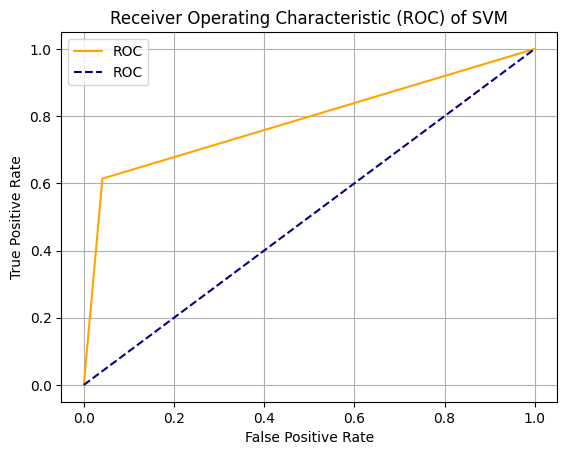

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, sv_pred)
plt.plot(fpr, tpr, color='orange', label = 'ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label = 'ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) of SVM')
plt.legend ()
plt.grid ()
plt.show ()